#### Import the needed libraries

In [227]:
# Import Python Libraries: Pandas and Numpy
import numpy as np
import pandas as pd

# Import Libraries for data visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

# Import libraries for calculations
import math
import datetime
import scipy
import scipy.stats as stats

#libray importing for clustering#
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#warning importation for unnecessary functions#
import warnings
warnings.filterwarnings("ignore")

#### Load the Online Retail dataset into dataframe 

In [228]:
data_df = pd.read_excel(r"Online Retail.xlsx")

In [229]:
# displaying the first 5 records, to check if correct data is loaded

data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Preprocess the dataset

In [230]:
# Check the datatypes of all Variables

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


We can see that, all the above attributes are correctly formatted. So no need of any changes.

In [231]:
# displaying the dimensions of the data, i.e rows and cols.

data_df.shape

(541909, 8)

We have total of 8 columns and 5,41,909 rows of data

In [232]:
# Get the summary statistics of numerical attributes of the data.

data_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Data Visualization for the dataset

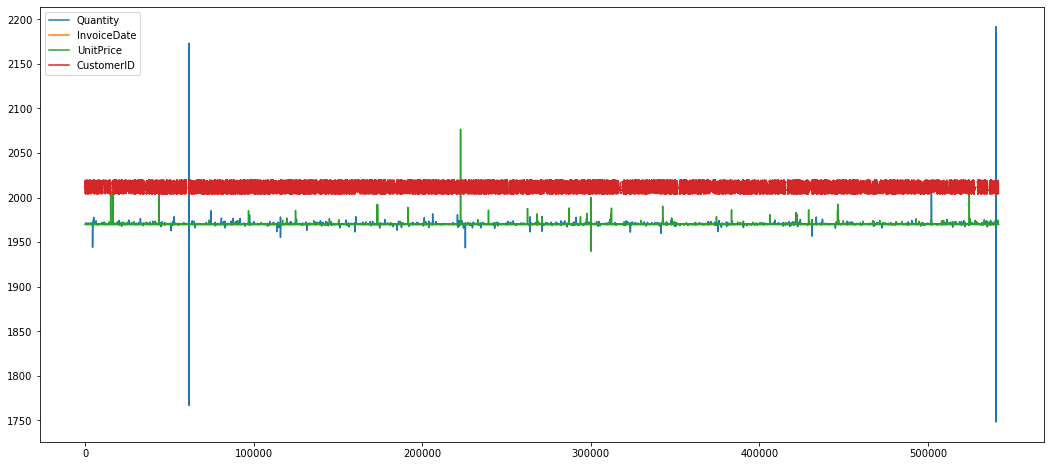

In [233]:
# represents the line plot for dataset

data_df.plot.line(figsize=(18, 8))
plt.show()

In the above image, we can see the line plot has been plotted for all numerical attributes.

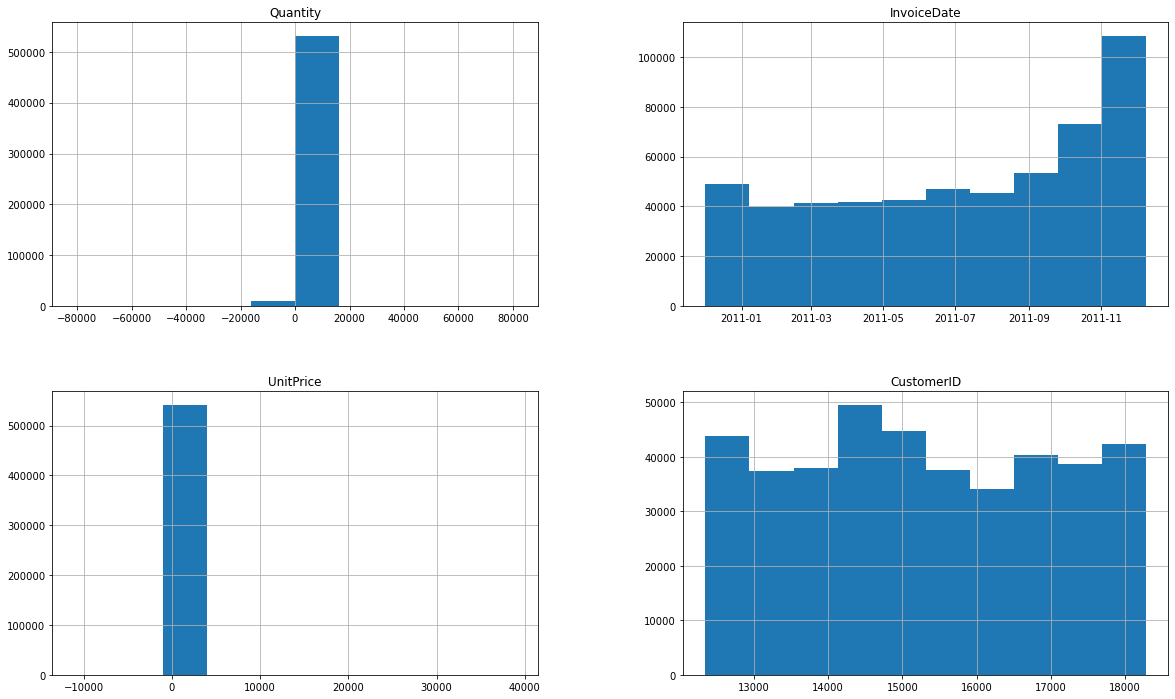

In [234]:
# plot histogram for each numeric
data_df.hist(figsize=(20, 12))
plt.show()

<AxesSubplot:>

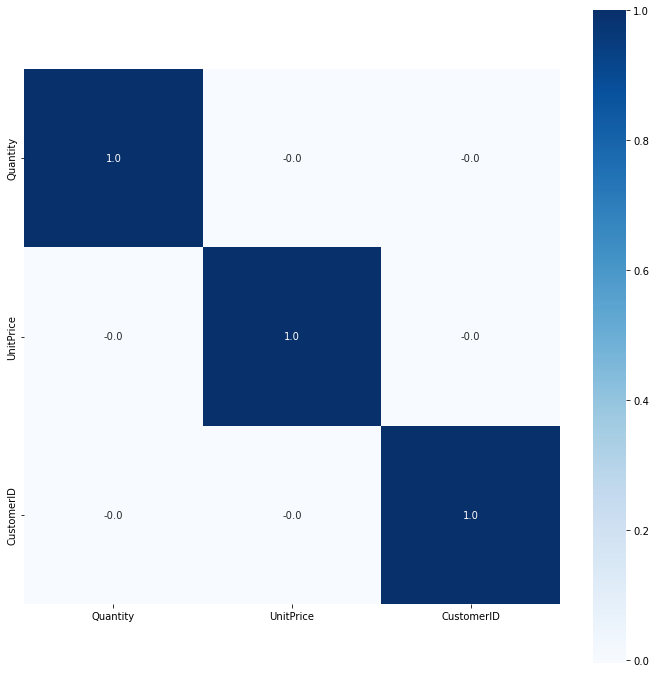

In [235]:
# Correlation matrix
corr  = data_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar= True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':10}, cmap = 'Blues')

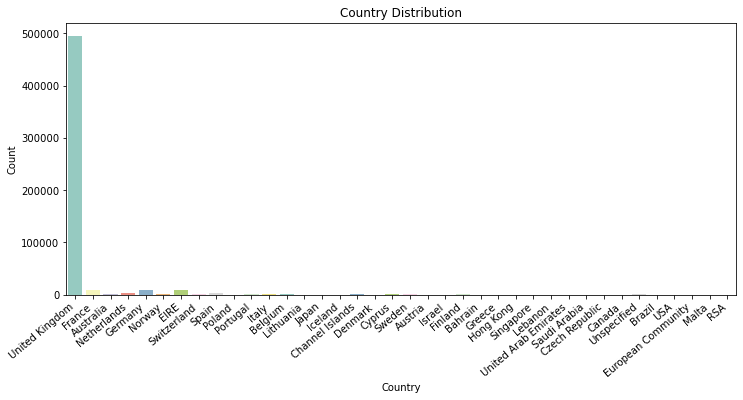

In [236]:
# Country distribution
plt.figure(figsize=(12,5))
sns.countplot(data_df['Country'],palette= 'Set3')
plt.xticks(rotation=40,ha='right')
plt.title("Country Distribution")
plt.xlabel('Country')
plt.ylabel('Count');

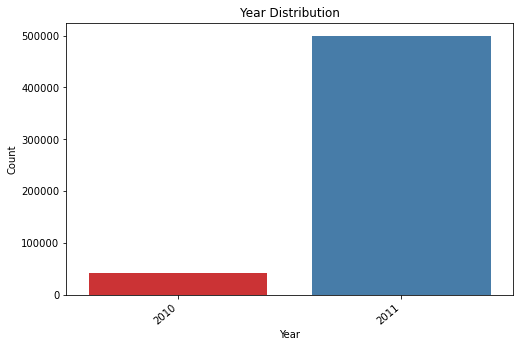

In [237]:
# Year distribution

plt.figure(figsize=(8,5))
# data_df['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')
sns.countplot(data_df['InvoiceDate'].dt.year,palette= 'Set1')
plt.xticks(rotation=40,ha='right')
plt.title("Year Distribution")
plt.xlabel('Year')
plt.ylabel('Count');

Text(0.5, 0, 'Month')

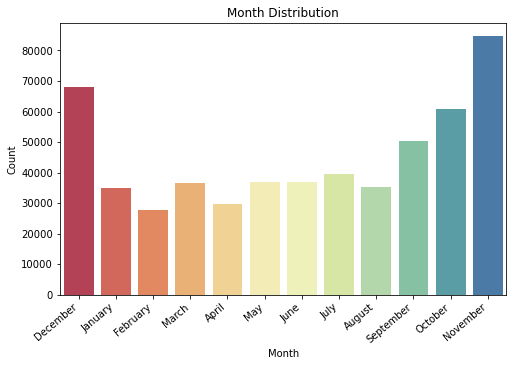

In [238]:
# Month distribution
plt.figure(figsize=(8,5))
plt.xticks(rotation=40,ha='right')
sns.countplot(data_df['InvoiceDate'].dt.month_name(), palette= 'Spectral')
plt.title("Month Distribution")
plt.ylabel('Count')
plt.xlabel('Month')

Text(0, 0.5, 'Count')

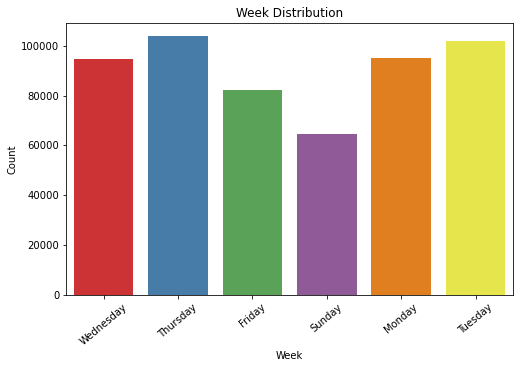

In [239]:
# Week distribution
plt.figure(figsize=(8,5))
sns.countplot(data_df['InvoiceDate'].dt.day_name(),palette= 'Set1')
plt.xticks(rotation=40)
plt.title("Week Distribution")
plt.xlabel('Week')
plt.ylabel('Count')

#### Exploratory data analysis

In [240]:
# Checking number of unique customers

data_df['CustomerID'].unique().shape

(4373,)

In [241]:
(data_df['CustomerID'].value_counts()/sum(data_df['CustomerID'].value_counts())*100).head(20).cumsum()

17841.0     1.962249
14911.0     3.413228
14096.0     4.673708
12748.0     5.814728
14606.0     6.498553
15311.0     7.110850
14646.0     7.623350
13089.0     8.079807
13263.0     8.492020
14298.0     8.895138
15039.0     9.265809
14156.0     9.614850
18118.0     9.930462
14159.0    10.228376
14796.0    10.514737
15005.0    10.799869
16033.0    11.083035
14056.0    11.360301
14769.0    11.629210
17511.0    11.893695
Name: CustomerID, dtype: float64

Out of 4373 unique customers, only 13 were ordered the 10% of the total sales of online retailers, based on cumulative sum.

In [242]:
# Now check for null values in the dataset. If we have any null values, we will remove or replace them.

round(100*(data_df.isna().sum()/len(data_df)))

InvoiceNo       0.0
StockCode       0.0
Description     0.0
Quantity        0.0
InvoiceDate     0.0
UnitPrice       0.0
CustomerID     25.0
Country         0.0
dtype: float64

We can see that, CustomerID has the more number of missing values.

<AxesSubplot:>

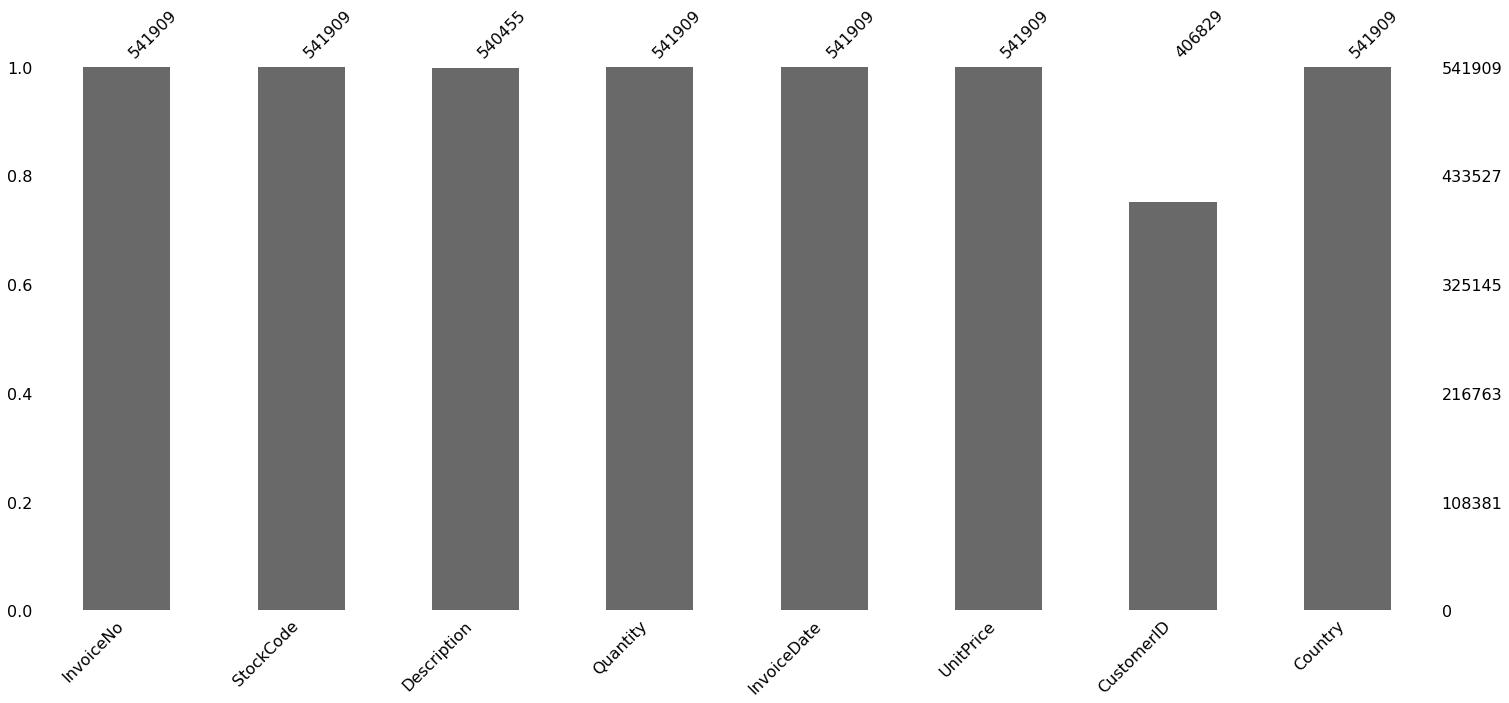

In [243]:
# visualizing the missing numbers in bar plot
import missingno as msno

msno.bar(data_df)

We can see that, in above image, CustomerId has more number of missing values.

In [244]:
# we will consider only those customer_Ids, which are present

print(f"Before reshaping: {data_df.shape}")
data_df = data_df[~(data_df["CustomerID"].isna())]
print(f"After reshaping: {data_df.shape}")

Before reshaping: (541909, 8)
After reshaping: (406829, 8)


In [245]:
# finding the value count for each country

data_df.Country.value_counts()

United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon                     45
Lithuani

As we can see, there are total 38 countries, in which UK has more number of transactions, hence, we will be separating our data for one geography.

In [246]:
# Considering the UK based data for our processing.

data_df = data_df[data_df["Country"] == "United Kingdom"]
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [247]:
# calculating the amount

data_df['Amount'] = data_df['Quantity']*data_df['UnitPrice']
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [248]:
data_df['Amount'].describe()

count    361878.000000
mean         18.702086
std         451.918484
min     -168469.600000
25%           3.750000
50%          10.200000
75%          17.700000
max      168469.600000
Name: Amount, dtype: float64

The output of the `amount` attribute have negitive values, which means that may have some return or negative transactions in this data.

In [249]:
# Remove negative or return transactions, i.e amount<=0

data_df = data_df[~(data_df['Amount']<=0)]
data_df[['CustomerID', 'Amount']].head()

,CustomerID,Amount
0,17850.0,15.30
1,17850.0,20.34
2,17850.0,22.00
3,17850.0,20.34
4,17850.0,20.34


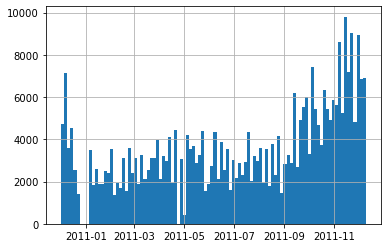

In [250]:
data_df['InvoiceDate'].hist(bins=100)
plt.show()

We can see that, in period of November 2011, there were more number of sales.

In [251]:
'''To create a Recency feature variable, we need to decide the reference date for analysis and we will 
define the reference date as one day before the last transaction'''

reference_date = data_df.InvoiceDate.max()
reference_date

Timestamp('2011-12-09 12:49:00')

In [252]:
reference_date = reference_date+datetime.timedelta(days=1) # timedelta function returns to total number of seconds
reference_date

Timestamp('2011-12-10 12:49:00')

In [253]:
# To construct the reference variable, we will use number of days before the reference date, when customer made a recent purchase
data_df['Last_Purchase_in_Days'] = (reference_date-data_df['InvoiceDate']).astype('timedelta64[D]')
data_df['Last_Purchase_in_Days'].head()

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: Last_Purchase_in_Days, dtype: float64

In [254]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Last_Purchase_in_Days
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,374.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,374.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,374.0


In [255]:
# Now to get the recent purchase of customer, we will group on customer_id and take the minimum value of Last_Purchase
customer_history_df=data_df[['CustomerID', 'Last_Purchase_in_Days']].groupby('CustomerID').min().reset_index()
customer_history_df.rename(columns={'Last_Purchase_in_Days':'Recency'}, inplace=True)
customer_history_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12747.0,2.0
2,12748.0,1.0
3,12749.0,4.0
4,12820.0,3.0


As we previously calculated our amount, i.e monetary value, which is for each element in dataframe.
Now we will find, how much does each customer spent the amount.

In [256]:
# We will acheive the above process by grouping on customer id, and applying sum aggregate operator and then resetting index
customer_amt_val = data_df[['CustomerID','Amount']].groupby('CustomerID').sum().reset_index()
# Then we will merge our amount data to Recency attribute data
customer_df = customer_history_df.merge(customer_amt_val, how='outer')
customer_df.head()

,CustomerID,Recency,Amount
0,12346.0,326.0,77183.60
1,12747.0,2.0,4196.01
2,12748.0,1.0,33719.73
3,12749.0,4.0,4090.88
4,12820.0,3.0,942.34


In [257]:
# Now we are left with frequency variable, we will find it with help of counting the number of times the transaction made by customer.
customer_freq = data_df[['CustomerID', 'Amount']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Amount':'Frequency'},inplace=True)
customer_freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,103
2,12748.0,4595
3,12749.0,199
4,12820.0,59


In [258]:
# Now we will be merging our frequency attribute to customer's data df 
customer_df = customer_df.merge(customer_freq, how='outer')
customer_df.head()

,CustomerID,Recency,Amount,Frequency
0,12346.0,326.0,77183.60,1
1,12747.0,2.0,4196.01,103
2,12748.0,1.0,33719.73,4595
3,12749.0,4.0,4090.88,199
4,12820.0,3.0,942.34,59


In [259]:
# getting the dimensions of the customer's RFM Model data

customer_df.shape

(3920, 4)

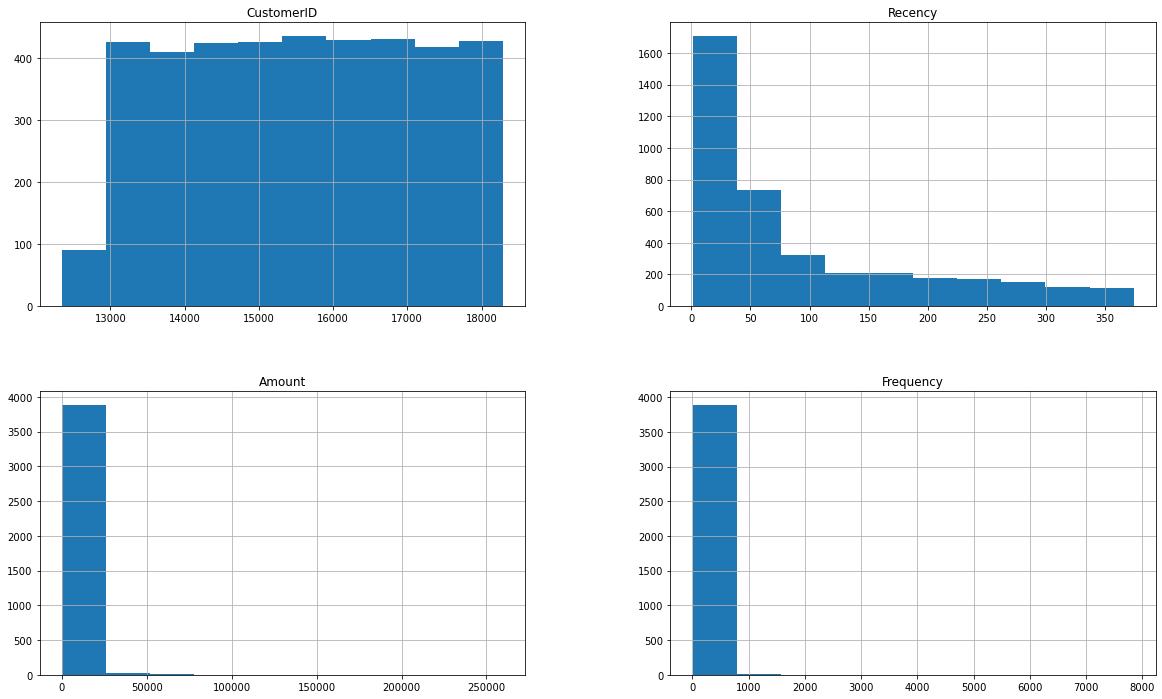

In [260]:
# plot histogram for each numeric

customer_df.hist(figsize=(20, 12))
plt.show()

In [261]:
import math
# Applying the logarithmic mathematical functions to get probabilistic data
customer_df['Recency_log'] = customer_df.Recency.apply(math.log)
customer_df['Amount_log'] = customer_df.Amount.apply(math.log)
customer_df['Frequency_log'] = customer_df.Frequency.apply(math.log)
customer_df.head()

,CustomerID,Recency,Amount,Frequency,Recency_log,Amount_log,Frequency_log
0,12346.0,326.0,77183.60,1,5.786897,11.253942,0.000000
1,12747.0,2.0,4196.01,103,0.693147,8.341889,4.634729
2,12748.0,1.0,33719.73,4595,0.000000,10.425838,8.432724
3,12749.0,4.0,4090.88,199,1.386294,8.316515,5.293305
4,12820.0,3.0,942.34,59,1.098612,6.848366,4.077537


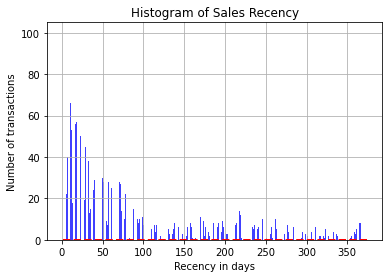

In [262]:
# Distribution of Customer Recency

x=customer_df.Recency
mu=np.mean(x)
sigma=math.sqrt(np.var(x))
n,bins,patches=plt.hist(x,1000,facecolor='blue',alpha=0.75) #alpha=transparency parameter
# Add a best fit line
y=scipy.stats.norm.pdf(bins,mu,sigma) #norm.pdf-probability density function for norm
l=plt.plot(bins,y,'r--',lw=2)

plt.xlabel('Recency in days')
plt.ylabel('Number of transactions')
plt.title('Histogram of Sales Recency')
plt.grid(True)
plt.show()

As we can see in above image, in recent 20-30 days, there were many number of transactions occurred.

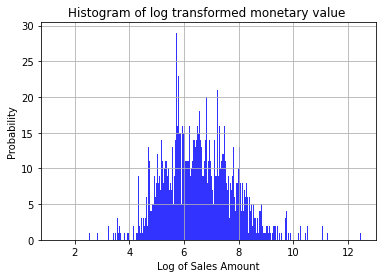

In [263]:
# Distribution of Monetary value

x=customer_df.Amount_log
n,bins,patches=plt.hist(x,1000,facecolor='b',alpha=0.8)
plt.xlabel('Log of Sales Amount')
plt.ylabel('Probability')
plt.title('Histogram of log transformed monetary value ')
plt.grid(True)
plt.show()

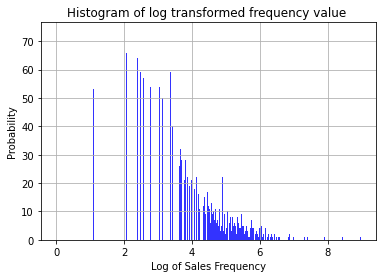

In [264]:
# Distribution of frequency data

x=customer_df.Frequency_log
n,bins,patches=plt.hist(x,1000,facecolor='b',alpha=0.8)
plt.xlabel('Log of Sales Frequency')
plt.ylabel('Probability')
plt.title('Histogram of log transformed frequency value ')
plt.grid(True)
plt.show()

In [265]:
# describing the stats for our RFM model

customer_df.describe()

,CustomerID,Recency,Amount,Frequency,Recency_log,Amount_log,Frequency_log
count,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000,3920.000000
mean,15562.059694,92.208418,1864.385601,90.388010,3.763997,6.543204,3.662183
std,1576.594671,99.533854,7482.817477,217.808385,1.433715,1.247128,1.338425
min,12346.000000,1.000000,3.750000,1.000000,0.000000,1.321756,0.000000
25%,14208.750000,18.000000,300.280000,17.000000,2.890372,5.704715,2.833213
50%,15569.500000,51.000000,652.280000,41.000000,3.931826,6.480474,3.713572
75%,16913.250000,143.000000,1576.585000,99.250000,4.962845,7.363016,4.597632
max,18287.000000,374.000000,259657.300000,7847.000000,5.924256,12.467118,8.967887


<AxesSubplot:>

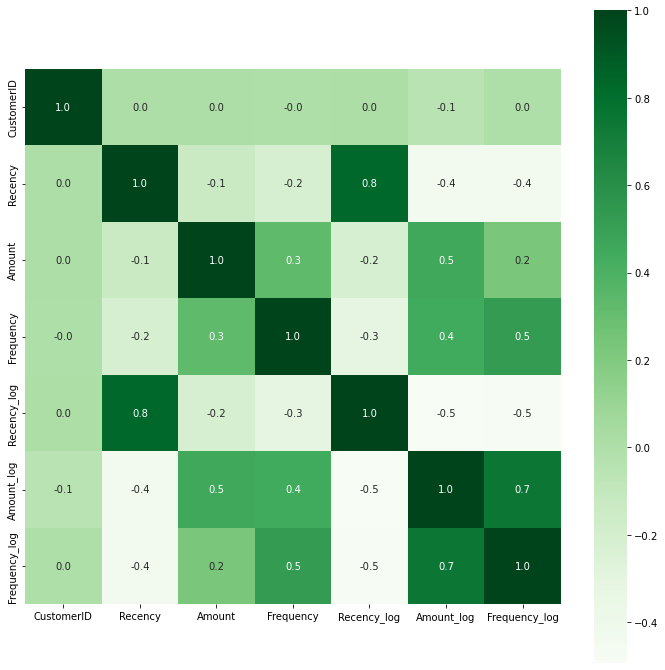

In [267]:
# correlation matrix of RFM model

corr  = customer_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, cbar= True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':10}, cmap = 'Greens')

### K means Clustering

In [268]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics

features = ['Recency_log','Frequency_log','Amount_log']
X = customer_df[features].values
# Scaling the values for our RFM model, as each attribute is over diff units
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

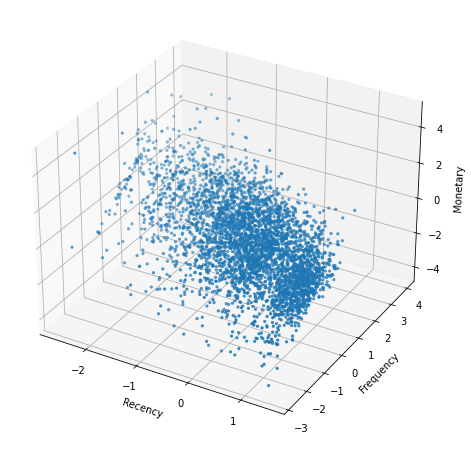

In [271]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs, ys, zs = X_scaled[:,0], X_scaled[:,1], X_scaled[:,2]
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [272]:
X = X_scaled
X[:, 0]

array([ 1.41113017e+00, -2.14215681e+00, -2.62568089e+00, ...,
       -1.17510866e+00, -1.65863274e+00, -1.95124118e-03])

In [273]:
X.shape

(3920, 3)

Text(0, 0.5, 'Sum of squared distance')

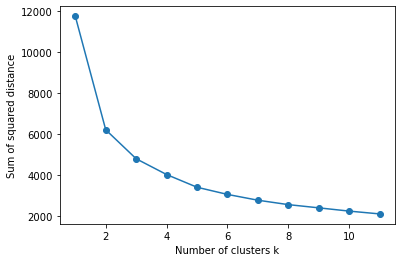

In [274]:
# processing our RFM model with the help of elbow method, to find the best value for K. by training our model by k means clustering.
sse = []
list_k = list(range(1, 12))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 4))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

In [275]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(X)

KMeans(max_iter=50, n_clusters=3)

In [276]:
predictions = kmeans.predict(X)

In [277]:
customer_df['Cluster_Id'] = kmeans.labels_
customer_df.head()

,CustomerID,Recency,Amount,Frequency,Recency_log,Amount_log,Frequency_log,Cluster_Id
0,12346.0,326.0,77183.60,1,5.786897,11.253942,0.000000,1
1,12747.0,2.0,4196.01,103,0.693147,8.341889,4.634729,2
2,12748.0,1.0,33719.73,4595,0.000000,10.425838,8.432724,2
3,12749.0,4.0,4090.88,199,1.386294,8.316515,5.293305,2
4,12820.0,3.0,942.34,59,1.098612,6.848366,4.077537,2


In [278]:
customer_df['Cluster_Id'].value_counts()

1    1672
0    1400
2     848
Name: Cluster_Id, dtype: int64

In [279]:
# taking cluster centers
cluster_centers = kmeans.cluster_centers_

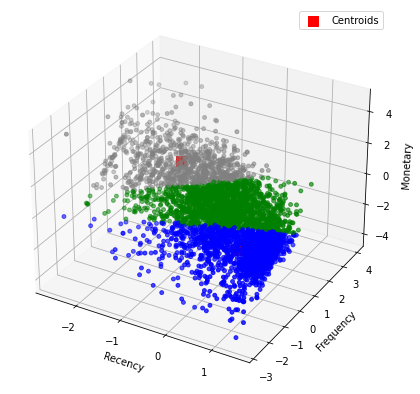

In [280]:
fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(111,projection='3d')
xs=X[:,0]
ys=X[:,1]
zs=X[:,2]
colors = ['blue', 'green', 'grey']
ax.scatter(xs,ys,zs,s=15,c=customer_df['Cluster_Id'],cmap=matplotlib.colors.ListedColormap(colors))
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], color = 'red', marker=',', 
            label = 'Centroids', s=100, alpha=1)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()
plt.show()

In [281]:
# Silhouette score
silhouette_sc_k_means = metrics.silhouette_score(X, predictions)
silhouette_sc_k_means

0.3041829580880848

#### DBSCAN

In [352]:
from sklearn.cluster import DBSCAN
from collections import Counter
colors = ['purple', 'red', 'blue', 'green', 'grey']

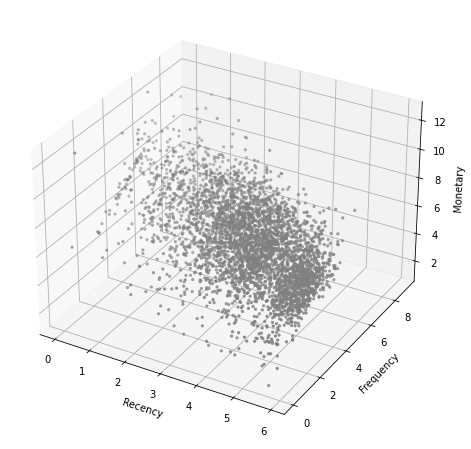

In [357]:
# plt.figure(figsize=(9,7))
# plt.scatter(customer_df['Recency_log'],customer_df['Amount_log'],s=15,color='grey')
# plt.title('Dataset',fontsize=20)
# plt.xlabel('Feature 1',fontsize=14)
# plt.ylabel('Feature 2',fontsize=14)
# plt.show()

fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=customer_df.Recency_log
ys=customer_df.Frequency_log
zs=customer_df.Amount_log
# xs, ys, zs = X_scaled[:,0], X_scaled[:,1], X_scaled[:,2]
ax.scatter(xs,ys,zs,s=5, color='grey')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [358]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(customer_df[['Recency_log', 'Amount_log', 'Frequency_log']])
# nbrs = neigh.fit(X[:,[0,1,2]])
distances, indices = nbrs.kneighbors(customer_df[['Recency_log', 'Amount_log', 'Frequency_log']])
# distances, indices = nbrs.kneighbors(X[:,[0,1,2]])

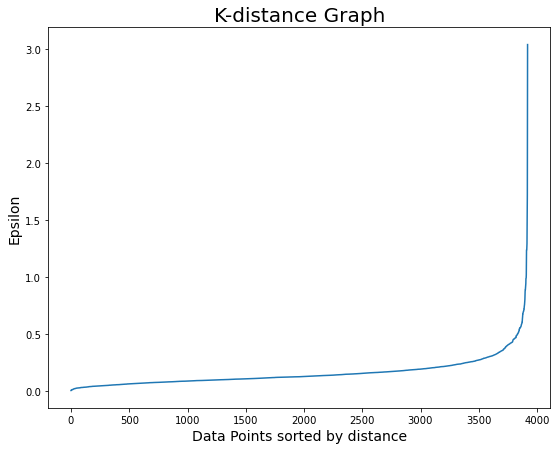

In [359]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances_new = distances[:,1]
plt.figure(figsize=(9, 7))
plt.plot(distances_new)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [367]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.6,min_samples=6)
# dbscan_opt.fit(X[:,[0,1,2]])
dbscan_opt.fit(customer_df[['Recency_log', 'Amount_log', 'Frequency_log']])

DBSCAN(eps=0.6, min_samples=6)

In [369]:
customer_df['DBSCAN_opt_labels']=dbscan_opt.labels_
customer_df['DBSCAN_opt_labels'].value_counts()

 0    3681
-1     130
 1      59
 2      38
 3       6
 4       6
Name: DBSCAN_opt_labels, dtype: int64

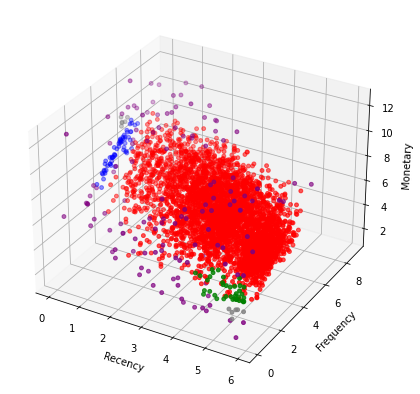

In [365]:
# Plotting the resulting clusters
# plt.figure(figsize=(9,7))
# plt.scatter(customer_df['Recency_log'],customer_df['Amount_log'],c=customer_df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
# plt.title('DBSCAN Clustering',fontsize=20)
# plt.xlabel('Recency',fontsize=14)
# plt.ylabel('Amount',fontsize=14)
# plt.show()

fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(111,projection='3d')
xs=customer_df.Recency_log
ys=customer_df.Frequency_log
zs=customer_df.Amount_log
# xs, ys, zs = X_scaled[:,0], X_scaled[:,1], X_scaled[:,2]
ax.scatter(xs,ys,zs,s=15,c=customer_df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

In [366]:
from sklearn import metrics

# silhouette_dbsc = metrics.silhouette_score(X[:,[0,1,2]], customer_df['DBSCAN_opt_labels'])
silhouette_dbsc = metrics.silhouette_score(customer_df[['Recency_log', 'Amount_log', 'Frequency_log']], customer_df['DBSCAN_opt_labels'])
silhouette_dbsc

0.1543203322769889

In [370]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda : colors[x % len(colors)])

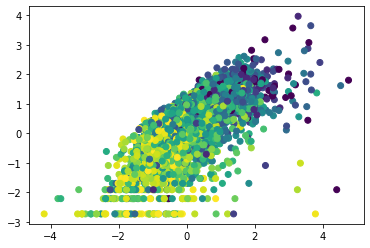

In [371]:
plt.scatter(X[:,2], X[:,1], c=X[:,0])

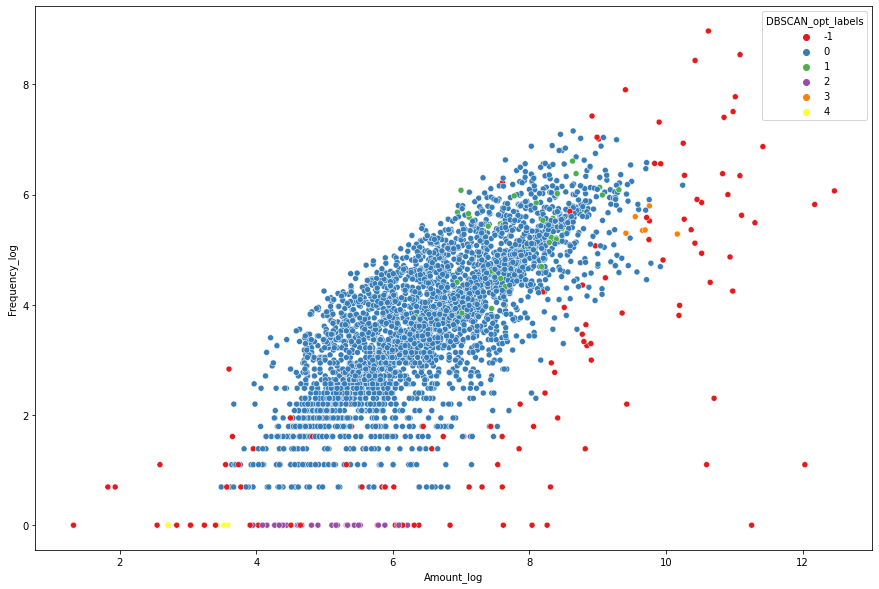

In [376]:
plt.figure(figsize=(15,10))

sns.scatterplot(x = 'Amount_log', y = 'Frequency_log', hue = 'DBSCAN_opt_labels', data = customer_df, palette = 'Set1');